# Decoding Strategies

## Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data

In [1]:
data = {
    "Type": ["Greedy Search", "Beam Search", "Multinominal Sampling", "Multinominal Beam Search", 
             "Diverse Beam Search", "Top-K Search", "Top-P Search", "Temperature Sampling", "Contrastive Search",
             "Greedy Search", "Beam Search", "Multinominal Sampling", "Multinominal Beam Search", 
             "Diverse Beam Search", "Top-K Search", "Top-P Search", "Temperature Sampling", "Contrastive Search"],
    "Model": ["Bert2Bert"] * 9 + ["mT5-base"] * 9,
    "ROUGE-1": [20.28, 20.64, 16.01, 20.24, 19.93, 16.29, 14.50, 17.41, 19.07,
                8.42, 21.72, 17.37, 21.52, 20.85, 17.24, 17.36, 19.08, 19.73],
    "BLEU": [7.22, 6.62, 5.35, 6.50, 6.79, 5.40, 5.11, 5.80, 6.44, 4.16, 7.28,
            5.98, 7.30, 7.17, 5.87, 5.94, 6.53, 6.74]
}

df = pd.DataFrame(data)

## Comparison of ROUGE-1 Scores by Decoding Strategy and Model

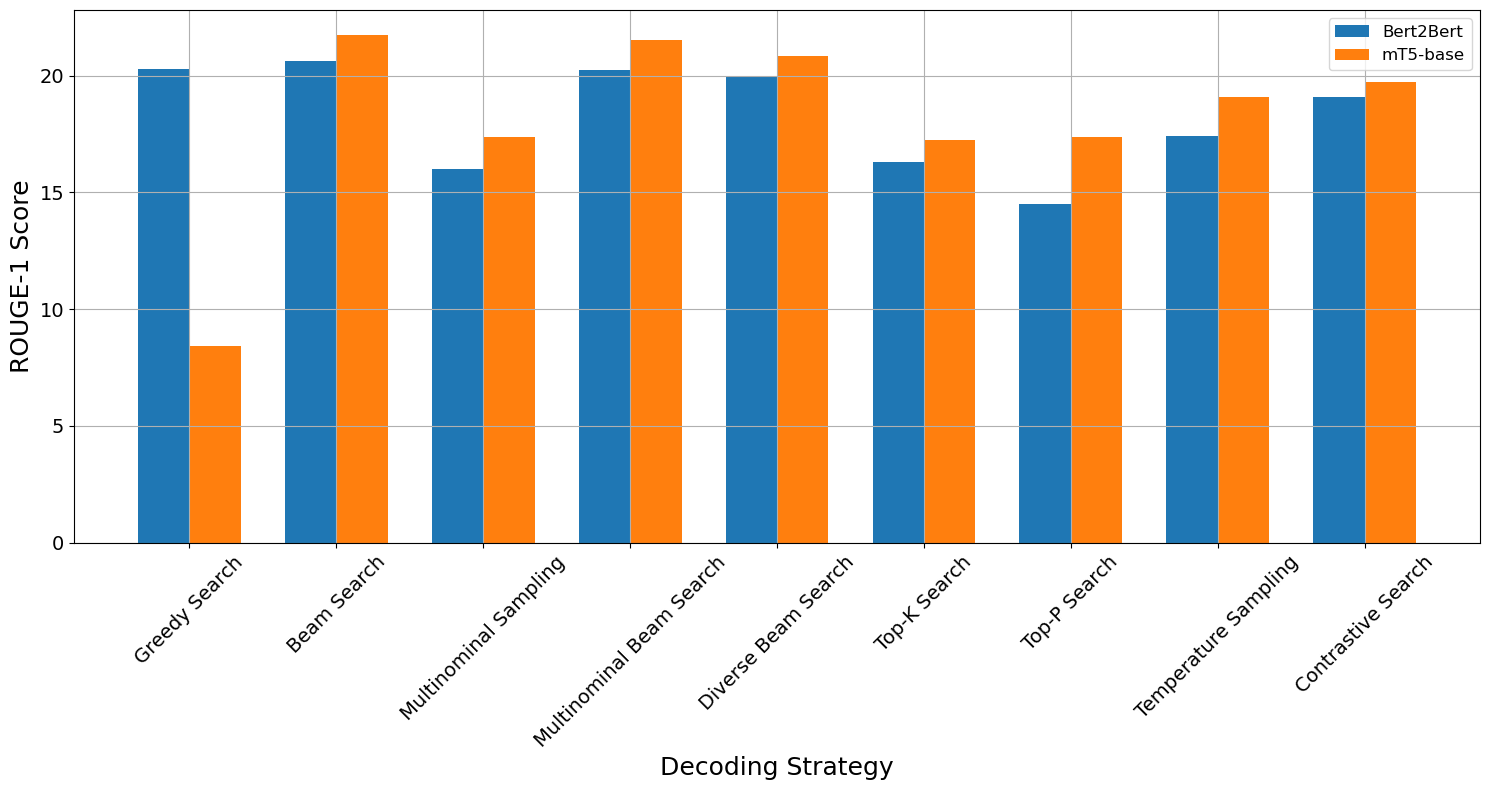

In [10]:
positions = np.arange(len(df['Type'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(15, 8))

for i, model in enumerate(df['Model'].unique()):
    model_data = df[df['Model'] == model]
    ax.bar(positions + i*width, model_data['ROUGE-1'], width, label=model)

ax.set_xlabel('Decoding Strategy', fontsize=18)
ax.set_ylabel('ROUGE-1 Score', fontsize=18)
ax.set_xticks(positions + width / 2)
ax.set_xticklabels(df['Type'].unique())
ax.legend(fontsize=12)
ax.grid(True)

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

## Comparison of BLEU Scores by Decoding Strategy and Model

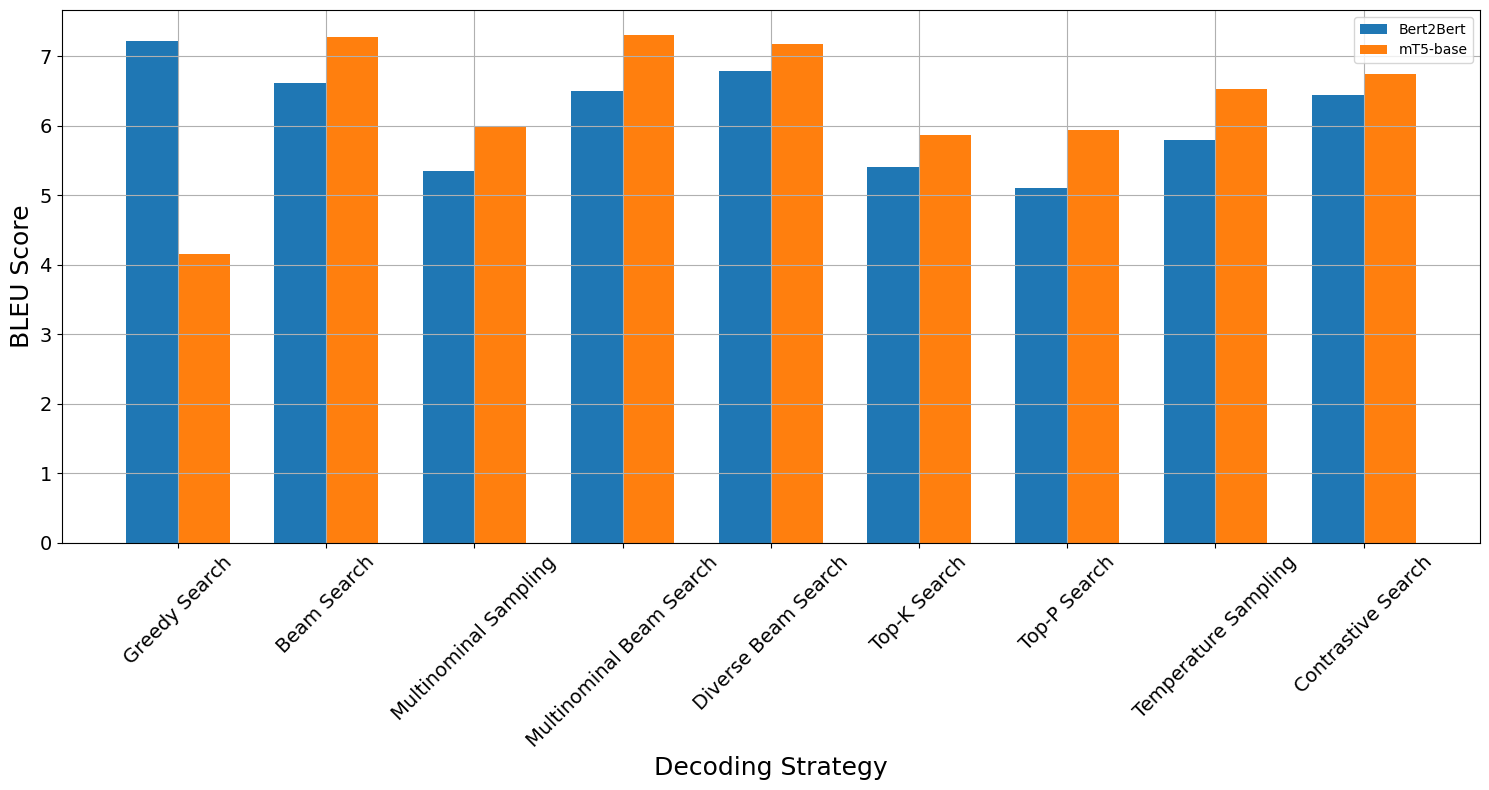

In [11]:
for i, model in enumerate(df['Model'].unique()):
    model_data = df[df['Model'] == model]
    ax.bar(positions + i*width, model_data['BLEU'], width, label=model)

ax.set_xlabel('Decoding Strategy', fontsize=18)
ax.set_ylabel('BLEU Score', fontsize=18)
ax.set_xticks(positions + width / 2)
ax.set_xticklabels(df['Type'].unique())
ax.legend()
ax.grid(True)

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# Constraints

## Force Tokens - R-1 Score for Control vs. Constrained Sets by Model

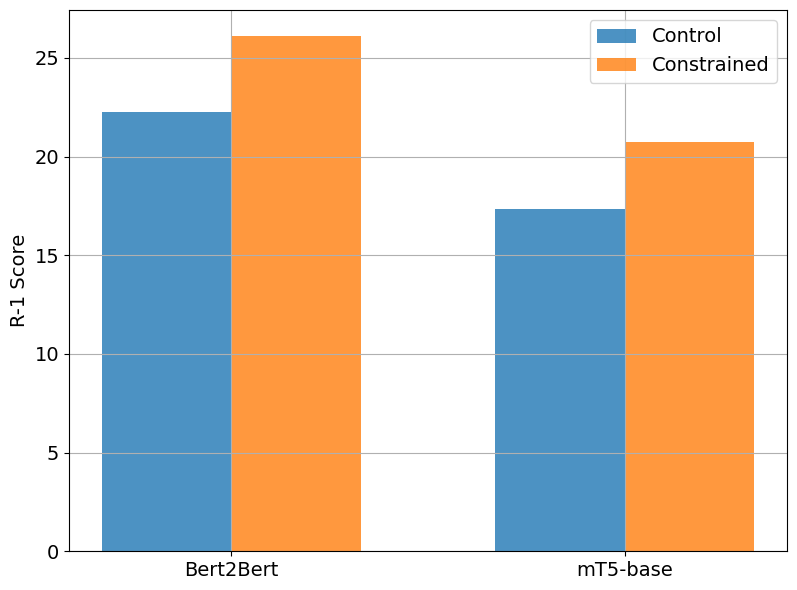

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.33
opacity = 0.8

models = ['Bert2Bert', 'mT5-base']
control_scores = {
    'Bert2Bert': [22.25, 2.46, 16.57, 5.90],
    'mT5-base': [17.36, 0.16, 14.73, 4.68]
}
constrained_scores = {
    'Bert2Bert': [26.12, 6.19, 18.9, 5.01],
    'mT5-base': [20.72, 3.46, 16.08, 5.14]
}

bar_positions = np.arange(len(models))
control_positions = bar_positions - bar_width / 2
constrained_positions = bar_positions + bar_width / 2

scores_control = [control_scores[model][0] for model in models]
scores_constrained = [constrained_scores[model][0] for model in models]

ax.bar(control_positions, scores_control, bar_width, 
       label='Control', alpha=opacity)
ax.bar(constrained_positions, scores_constrained, bar_width, 
       label='Constrained', alpha=opacity)
ax.set_ylabel('R-1 Score', fontsize=14)
ax.set_xticks(bar_positions)
ax.set_xticklabels(models, fontsize=14)
ax.legend(fontsize=14)
ax.grid(True)

plt.tight_layout()
plt.yticks(fontsize=14)
plt.show()


## NER - R-1 Score for Control vs. Constrained Sets by Model

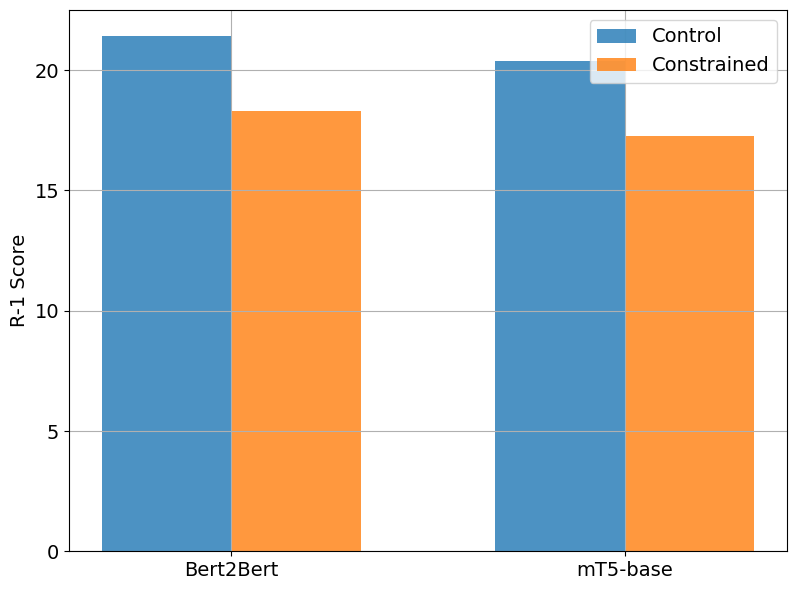

In [25]:
new_control_scores = {
    'Bert2Bert': [21.43, 6.38, 16.74, 7.31],
    'mT5-base': [20.39, 5.32, 15.68, 7.25]
}

new_constrained_scores = {
    'Bert2Bert': [18.30, 4.43, 13.60, 5.53],
    'mT5-base': [17.26, 3.88, 12.45, 5.20]
}

fig, ax = plt.subplots(figsize=(8, 6))
new_control_positions = bar_positions - bar_width / 2
new_constrained_positions = bar_positions + bar_width / 2

new_scores_control = [new_control_scores[model][0] for model in models]
new_scores_constrained = [new_constrained_scores[model][0] for model in models]

ax.bar(new_control_positions, new_scores_control, bar_width, 
       label='Control', alpha=opacity)
ax.bar(new_constrained_positions, new_scores_constrained, bar_width, 
       label='Constrained', alpha=opacity)
ax.set_ylabel('R-1 Score', fontsize=14)
ax.set_xticks(bar_positions)
ax.set_xticklabels(models, fontsize=14)
ax.legend(fontsize=14)
ax.grid(True)

plt.tight_layout()
plt.yticks(fontsize=14)
plt.show()


## Omit Tokens - R-1 Score for Control vs. Constrained Sets by Model

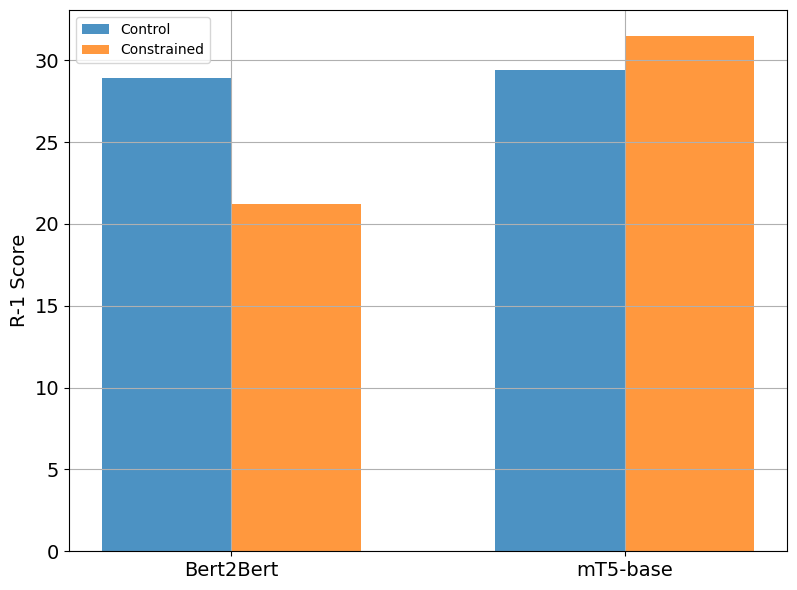

In [27]:
latest_control_scores = {
    'Bert2Bert': [28.90, 11.11, 18.86, 6.16],
    'mT5-base': [29.42, 8.57, 14.71, 5.57]
}

latest_constrained_scores = {
    'Bert2Bert': [21.22, 3.11, 15.43, 6.62],
    'mT5-base': [31.50, 2.35, 22.58, 6.52]
}

latest_scores_control = [latest_control_scores[model][0] for model in models]
latest_scores_constrained = [latest_constrained_scores[model][0] for model in models]

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(new_control_positions, latest_scores_control, bar_width, label='Control', alpha=opacity)
ax.bar(new_constrained_positions, latest_scores_constrained, bar_width, label='Constrained', alpha=opacity)
ax.set_ylabel('R-1 Score', fontsize=14)
ax.set_xticks(bar_positions)
ax.set_xticklabels(models, fontsize=14)
ax.legend(fontsize=10)
ax.grid(True)

plt.tight_layout()
plt.yticks(fontsize=14)
plt.show()